# System Neural Diversity 
## An Ensemble

In [1]:
from utils.pack import Pack
from utils.agent import Agent
from utils.metrics import ThoughtDiversity
from collections import defaultdict
import networkx as nx

## Single Agent

In [2]:
embedding_params = ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9]
agent_hilbert = Agent('agent_hilbert_space',
                      'documents/HilbertSpaceMulti.pdf', 1, embedding_params, False)
agent_hilbert.chat_bot.one_question(
    "Imagine how hilbert space could be used in a neural network for neuron representation?")

🔥  Conjuring up agent_hilbert_space  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
🧩 chunks created 🧩
⚫
 🔗 embedding created 🔗
⚫


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_hilbert_space is documents/HilbertSpaceMulti.pdf



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

'Hilbert space could potentially be used in a neural network for neuron representation by treating each neuron or each state of the neuron as a vector in the Hilbert space. The dimension of the Hilbert space would correspond to the number of potential states a neuron can have. \n\nThe weight of the connections between neurons, or synapses, could be represented by the coefficients of the vectors. The activation function in neural networks, which determines the output of a neuron given an input, could be represented by a kind of operator in the Hilbert space.\n\nFurthermore, the use of Hilbert space could facilitate the application of quantum computing concepts to neural networks, given that quantum mechanics often uses complex-valued probability amplitudes, which are naturally represented in Hilbert space. Quantum neural networks could potentially outperform classical ones in certain tasks, but they are still mostly theoretical at this point.'

## Pack

In [3]:
learning_to_act = "chroma_db/agent_ltoa"
system_neural_diversity = "chroma_db/agent_snd"
foundational_models = "chroma_db/agent_foundation"
norbet_cog = "chroma_db/agent_norbert"
viz_quant = "chroma_db/agent_quant"
cot_path = "chroma_db/agent_cot"

embedding_params = [
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.8]
]
# name, path, cot_type, new_bool
agent_specs = [
    ['agent_ltoa', learning_to_act, 0, True],
    ['agent_snd', system_neural_diversity, 0, True],
    ['agent_foundation', foundational_models, 0, True],
    ['agent_quant', viz_quant, 0, True],
    ['agent_norbert', norbet_cog, 0, True],
    ['agent_cot', cot_path, 0, True]
]

test_pack = Pack(agent_specs, embedding_params)

🔥  Conjuring up agent_ltoa  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_ltoa is chroma_db/agent_ltoa

🔥  Conjuring up agent_snd  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_snd is chroma_db/agent_snd

🔥  Conjuring up agent_foundation  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_foundation is chroma_db/agent_foundation

🔥  Conjuring up agent_quant  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_quant is chroma_db/agent_quant

🔥  Conjuring up agent_norbert  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_norbert is chr

In [4]:
edges = test_pack.update_weighted_edges(
    question="Imagine how a neuron for a neural network may be reimagined based on the text.")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

monte carlo finished


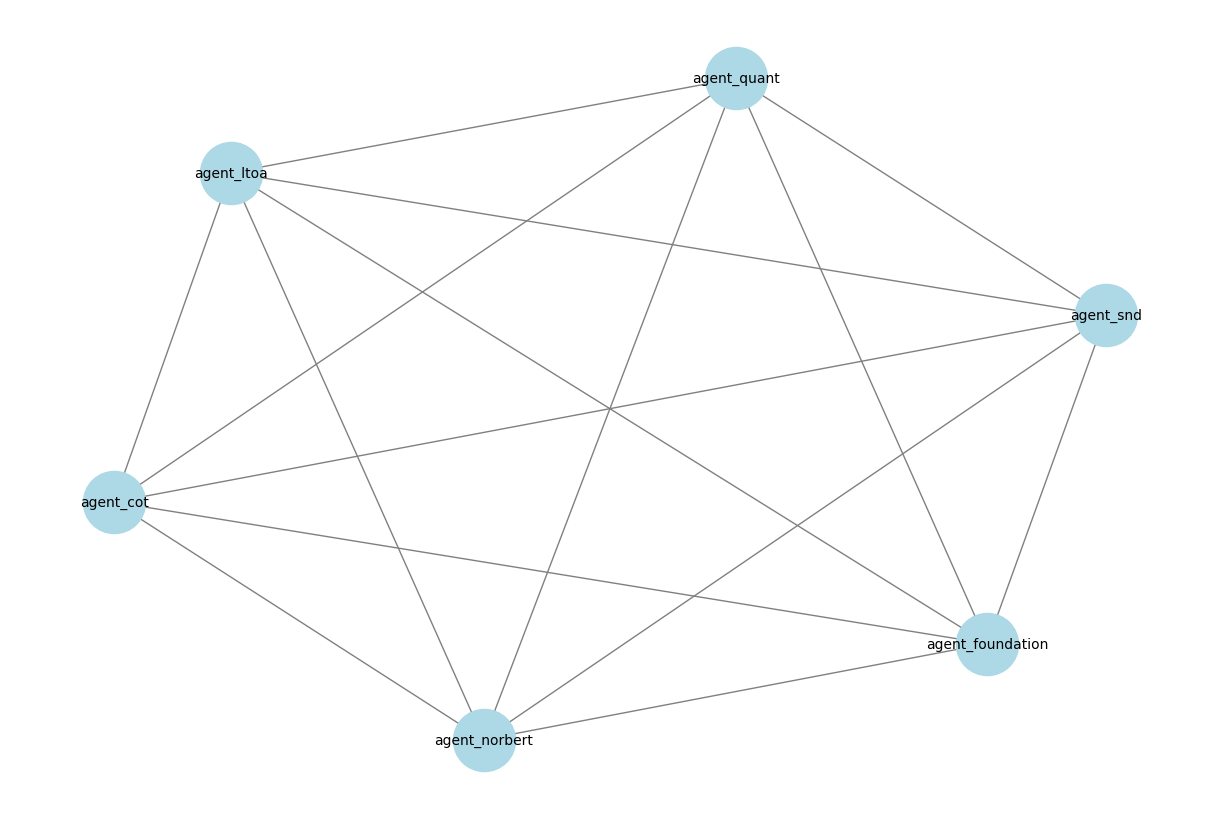

In [5]:
test_pack.graph()

In [10]:
nx.eigenvector_centrality(test_pack.G)

{'agent_ltoa': 0.408248290463863,
 'agent_quant': 0.408248290463863,
 'agent_cot': 0.408248290463863,
 'agent_snd': 0.408248290463863,
 'agent_norbert': 0.408248290463863,
 'agent_foundation': 0.408248290463863}

test_pack.graph()

## Meterics = Vectors

In [7]:
metrics = ThoughtDiversity(test_pack)
metrics.monte_carlo_sim(
    question="Imagine how AI agents be desinged to be more creative?")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[2.9622434731738423,
  2.8509083915896167,
  3.03559553802271,
  3.032857389968159,
  2.8663293821952336,
  3.0453906946354574],
 [19.341314838788676,
  17.30349305108011,
  20.81336936215174,
  20.756457227807086,
  17.57239811717751,
  21.01824131307984],
 [0.053490990990990986,
  0.006420582331724296,
  0.003242090774611423,
  0.049814520402755684,
  0.0026565375402584704,
  0.04757462686567164,
  0.051264044943820225,
  0.003676470588235296,
  0.05574324324324324,
  0.004069701970525164,
  0.043898156277436345,
  0.008168616377571603,
  0.04758757435558492,
  0.004498871694768129,
  0.05206677265500795]]

In [ ]:
metrics.shannon_entropy_scores

In [8]:
metrics.true_diversity_scores

[19.341314838788676,
 17.30349305108011,
 20.81336936215174,
 20.756457227807086,
 17.57239811717751,
 21.01824131307984]

In [9]:
metrics.wasserstein_metrics

[0.053490990990990986,
 0.006420582331724296,
 0.003242090774611423,
 0.049814520402755684,
 0.0026565375402584704,
 0.04757462686567164,
 0.051264044943820225,
 0.003676470588235296,
 0.05574324324324324,
 0.004069701970525164,
 0.043898156277436345,
 0.008168616377571603,
 0.04758757435558492,
 0.004498871694768129,
 0.05206677265500795]